In [1]:
import sys
print(sys.version)


3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
info = pd.read_csv("Motor Vehicle Collisions Crashes .csv")
print(info)

C:\Users\Manoj\AppData\Local\Temp\ipykernel_30548\275370606.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  info = pd.read_csv("Motor Vehicle Collisions Crashes .csv")


         CRASH DATE CRASH TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0        09/11/2021       2:39        NaN      NaN        NaN        NaN   
1        03/26/2022      11:45        NaN      NaN        NaN        NaN   
2        06/29/2022       6:55        NaN      NaN        NaN        NaN   
3        09/11/2021       9:35   BROOKLYN  11208.0  40.667202 -73.866500   
4        12/14/2021       8:13   BROOKLYN  11233.0  40.683304 -73.917274   
...             ...        ...        ...      ...        ...        ...   
2030505  09/19/2023      15:55        NaN      NaN  40.761436 -73.761760   
2030506  09/14/2023      23:15  MANHATTAN  10016.0  40.744064 -73.987755   
2030507  09/12/2023      16:00     QUEENS  11433.0  40.707947 -73.783310   
2030508  09/19/2023      10:45        NaN      NaN  40.840230 -73.880104   
2030509  09/19/2023      15:40        NaN      NaN  40.635520 -74.016700   

                        LOCATION           ON STREET NAME CROSS STREET NAME  \
0       

In [3]:
info.count()

CRASH DATE                       2030510
CRASH TIME                       2030510
BOROUGH                          1398848
ZIP CODE                         1398608
LATITUDE                         1799915
LONGITUDE                        1799915
LOCATION                         1799915
ON STREET NAME                   1602267
CROSS STREET NAME                1268728
OFF STREET NAME                   335870
NUMBER OF PERSONS INJURED        2030492
NUMBER OF PERSONS KILLED         2030479
NUMBER OF PEDESTRIANS INJURED    2030510
NUMBER OF PEDESTRIANS KILLED     2030510
NUMBER OF CYCLIST INJURED        2030510
NUMBER OF CYCLIST KILLED         2030510
NUMBER OF MOTORIST INJURED       2030510
NUMBER OF MOTORIST KILLED        2030510
CONTRIBUTING FACTOR VEHICLE 1    2024085
CONTRIBUTING FACTOR VEHICLE 2    1719867
CONTRIBUTING FACTOR VEHICLE 3     144243
CONTRIBUTING FACTOR VEHICLE 4      32398
CONTRIBUTING FACTOR VEHICLE 5       8761
COLLISION_ID                     2030510
VEHICLE TYPE COD

In [4]:
print(len(info.columns))

29


In [5]:
info.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.799915e+06,1.799915e+06,2.030492e+06,2.030479e+06,2.030510e+06,2.030510e+06,2.030510e+06,2.030510e+06,2.030510e+06,2.030510e+06,2.030510e+06
mean,4.062776e+01,-7.375229e+01,3.041440e-01,1.453844e-03,5.537131e-02,7.249410e-04,2.637022e-02,1.122871e-04,2.191105e-01,5.954169e-04,3.125784e+06
std,1.980695e+00,3.726380e+00,6.952049e-01,4.017779e-02,2.417310e-01,2.740456e-02,1.621889e-01,1.064234e-02,6.563292e-01,2.661456e-02,1.504216e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066791e+01,-7.397492e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.143747e+06
50%,4.072097e+01,-7.392732e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.651484e+06
75%,4.076956e+01,-7.386670e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.159358e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.667315e+06


In [6]:

clean = 'ZIP CODE'  

info = info.drop(['VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'OFF STREET NAME'], axis=1)


# Remove rows with null values in the column
info = info.dropna(subset=[clean])
# Replace NaN and inf values with 0 in columns
columns_to_replace = ['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST INJURED','NUMBER OF MOTORIST KILLED','CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5']
info[columns_to_replace] = info[columns_to_replace].replace([np.inf, -np.inf, np.nan], 0)


# Write the updated DataFrame back to a new CSV file
info.to_csv('cleaned.csv', index=False)

In [7]:

data = pd.read_csv('cleaned.csv')
data.info()
data.to_csv('C:\\Users\\Manoj\\Downloads\\cleaned.csv', index=False)

C:\Users\Manoj\AppData\Local\Temp\ipykernel_30548\992132395.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('cleaned.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398608 entries, 0 to 1398607
Data columns (total 25 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH DATE                     1398608 non-null  object 
 1   CRASH TIME                     1398608 non-null  object 
 2   BOROUGH                        1398608 non-null  object 
 3   ZIP CODE                       1398608 non-null  object 
 4   LATITUDE                       1362193 non-null  float64
 5   LONGITUDE                      1362193 non-null  float64
 6   LOCATION                       1362193 non-null  object 
 7   ON STREET NAME                 1096875 non-null  object 
 8   CROSS STREET NAME              1096308 non-null  object 
 9   NUMBER OF PERSONS INJURED      1398608 non-null  float64
 10  NUMBER OF PERSONS KILLED       1398608 non-null  float64
 11  NUMBER OF PEDESTRIANS INJURED  1398608 non-null  int64  
 12  NUMBER OF PEDE

In [8]:
column_names = list(data.columns.values)
print(column_names)

['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']


In [9]:
print(data)

         CRASH DATE CRASH TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0        09/11/2021       9:35   BROOKLYN  11208.0  40.667202 -73.866500   
1        12/14/2021       8:13   BROOKLYN  11233.0  40.683304 -73.917274   
2        12/14/2021       8:17      BRONX  10475.0  40.868160 -73.831480   
3        12/14/2021      21:10   BROOKLYN  11207.0  40.671720 -73.897100   
4        12/14/2021      14:58  MANHATTAN  10017.0  40.751440 -73.973970   
...             ...        ...        ...      ...        ...        ...   
1398603  09/19/2023       5:01  MANHATTAN  10025.0  40.796642 -73.968480   
1398604  09/19/2023      16:50   BROOKLYN  11213.0  40.673410 -73.933480   
1398605  08/29/2023      18:00     QUEENS  11373.0  40.735990 -73.865510   
1398606  09/14/2023      23:15  MANHATTAN  10016.0  40.744064 -73.987755   
1398607  09/12/2023      16:00     QUEENS  11433.0  40.707947 -73.783310   

                        LOCATION      ON STREET NAME CROSS STREET NAME  \
0          (4

In [10]:
data.count()

CRASH DATE                       1398608
CRASH TIME                       1398608
BOROUGH                          1398608
ZIP CODE                         1398608
LATITUDE                         1362193
LONGITUDE                        1362193
LOCATION                         1362193
ON STREET NAME                   1096875
CROSS STREET NAME                1096308
NUMBER OF PERSONS INJURED        1398608
NUMBER OF PERSONS KILLED         1398608
NUMBER OF PEDESTRIANS INJURED    1398608
NUMBER OF PEDESTRIANS KILLED     1398608
NUMBER OF CYCLIST INJURED        1398608
NUMBER OF CYCLIST KILLED         1398608
NUMBER OF MOTORIST INJURED       1398608
NUMBER OF MOTORIST KILLED        1398608
CONTRIBUTING FACTOR VEHICLE 1    1398608
CONTRIBUTING FACTOR VEHICLE 2    1398608
CONTRIBUTING FACTOR VEHICLE 3    1398608
CONTRIBUTING FACTOR VEHICLE 4    1398608
CONTRIBUTING FACTOR VEHICLE 5    1398608
COLLISION_ID                     1398608
VEHICLE TYPE CODE 1              1388941
VEHICLE TYPE COD

In [11]:
dup = data.duplicated()
print(dup)

0          False
1          False
2          False
3          False
4          False
           ...  
1398603    False
1398604    False
1398605    False
1398606    False
1398607    False
Length: 1398608, dtype: bool


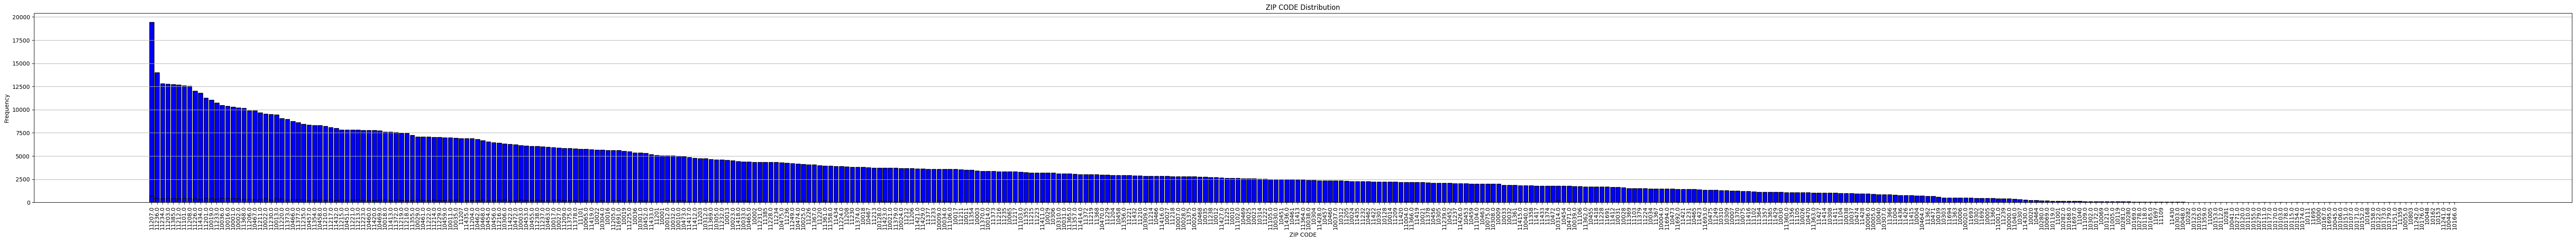

In [12]:
zip_codes = data['ZIP CODE']

# Plot the ZIP CODE data
plt.figure(figsize=(80, 6))
plt.bar(zip_codes.value_counts().index.astype(str),zip_codes.value_counts().values, color='blue', edgecolor='black')
plt.title('ZIP CODE Distribution')
plt.xlabel('ZIP CODE')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')
plt.show()

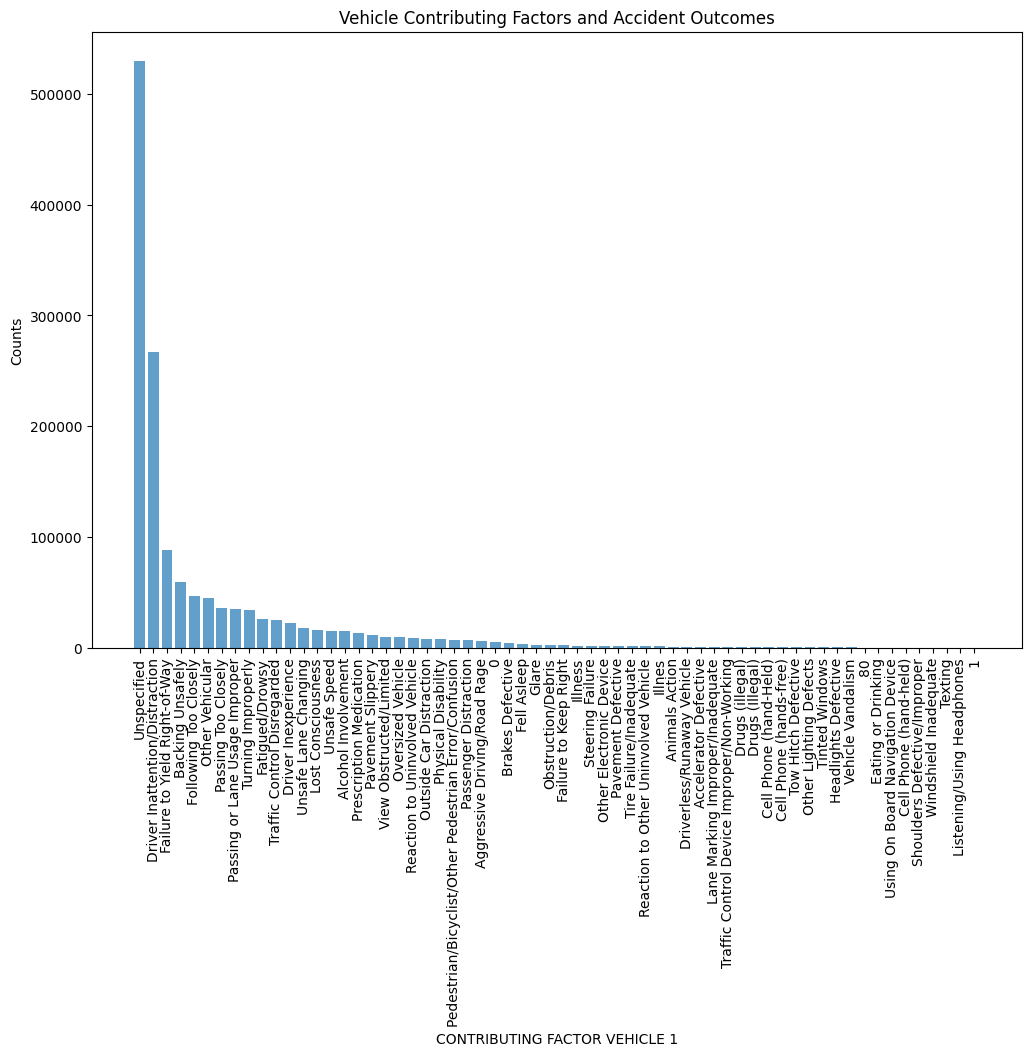

In [14]:

contributing_factor = data['CONTRIBUTING FACTOR VEHICLE 1'].astype(str)
factors_count = contributing_factor.value_counts()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the data
ax.bar(factors_count.index, factors_count, alpha=0.7)

# Set labels and title
ax.set_xlabel('CONTRIBUTING FACTOR VEHICLE 1')
ax.set_ylabel('Counts')
ax.set_title('Vehicle Contributing Factors and Accident Outcomes')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

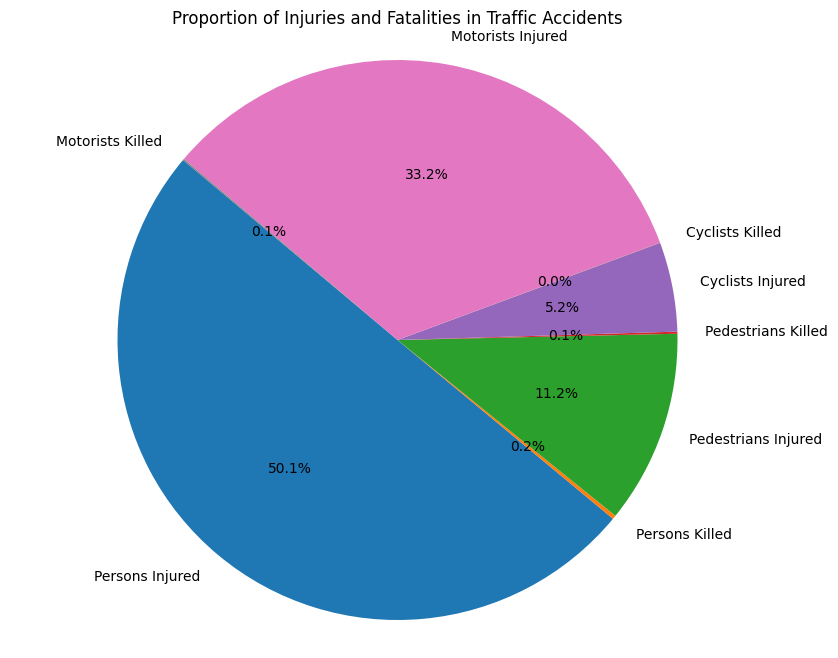

In [15]:


# Summing up the totals for each category
total_injured = data['NUMBER OF PERSONS INJURED'].sum() + data['NUMBER OF PEDESTRIANS INJURED'].sum() + data['NUMBER OF CYCLIST INJURED'].sum() + data['NUMBER OF MOTORIST INJURED'].sum()
total_killed = data['NUMBER OF PERSONS KILLED'].sum() + data['NUMBER OF PEDESTRIANS KILLED'].sum() + data['NUMBER OF CYCLIST KILLED'].sum() + data['NUMBER OF MOTORIST KILLED'].sum()

# Data to plot
labels = ['Persons Injured', 'Persons Killed', 'Pedestrians Injured', 'Pedestrians Killed', 'Cyclists Injured', 'Cyclists Killed', 'Motorists Injured', 'Motorists Killed']
sizes = [data['NUMBER OF PERSONS INJURED'].sum(), data['NUMBER OF PERSONS KILLED'].sum(), data['NUMBER OF PEDESTRIANS INJURED'].sum(), data['NUMBER OF PEDESTRIANS KILLED'].sum(), data['NUMBER OF CYCLIST INJURED'].sum(), data['NUMBER OF CYCLIST KILLED'].sum(), data['NUMBER OF MOTORIST INJURED'].sum(), data['NUMBER OF MOTORIST KILLED'].sum()]

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Injuries and Fatalities in Traffic Accidents')
plt.show()


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Question 1

In [18]:

def split_location(location):
    if isinstance(location, str):
        latitude, longitude = location.strip('()').split(', ')
        return float(latitude), float(longitude)
    else:
        return np.nan, np.nan

data['LATITUDE'], data['LONGITUDE'] = zip(*data['LOCATION'].apply(split_location))

injury_columns = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PEDESTRIANS INJURED', 
                  'NUMBER OF CYCLIST INJURED', 'NUMBER OF MOTORIST INJURED', 
                  'LATITUDE', 'LONGITUDE']

fatality_columns = ['NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS KILLED', 
                    'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST KILLED', 
                    'LATITUDE', 'LONGITUDE']

df_injuries = data[injury_columns].dropna()
df_fatalities = data[fatality_columns].dropna()

# Apply K-means clustering
kmeans_injuries = KMeans(n_clusters=3, random_state=0).fit(df_injuries)
kmeans_fatalities = KMeans(n_clusters=3, random_state=0).fit(df_fatalities)


df_injuries['cluster'] = kmeans_injuries.labels_
df_fatalities['cluster'] = kmeans_fatalities.labels_


print(df_injuries.head())
print(df_fatalities.head())


C:\Users\Manoj\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Manoj\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


   NUMBER OF PERSONS INJURED  NUMBER OF PEDESTRIANS INJURED  \
0                        0.0                              0   
1                        0.0                              0   
2                        2.0                              0   
3                        0.0                              0   
4                        0.0                              0   

   NUMBER OF CYCLIST INJURED  NUMBER OF MOTORIST INJURED   LATITUDE  \
0                          0                           0  40.667202   
1                          0                           0  40.683304   
2                          0                           2  40.868160   
3                          0                           0  40.671720   
4                          0                           0  40.751440   

   LONGITUDE  cluster  
0 -73.866500        0  
1 -73.917274        0  
2 -73.831480        2  
3 -73.897100        0  
4 -73.973970        0  
   NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS

Cluster Information for Injuries:
          NUMBER OF PERSONS INJURED  NUMBER OF PEDESTRIANS INJURED  \
cluster                                                             
0                         0.103495                       0.067094   
1                         0.392267                       0.077643   
2                         1.544903                       0.046006   

         NUMBER OF CYCLIST INJURED  NUMBER OF MOTORIST INJURED   LATITUDE  \
cluster                                                                     
0                         0.032892                    0.000032  40.723769   
1                         0.043343                    0.254755   0.000000   
2                         0.007863                    1.487143  40.716014   

         LONGITUDE  
cluster             
0       -73.923147  
1         0.000000  
2       -73.908947  
Cluster Information for Fatalities:
          NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS KILLED  \
cluster                 

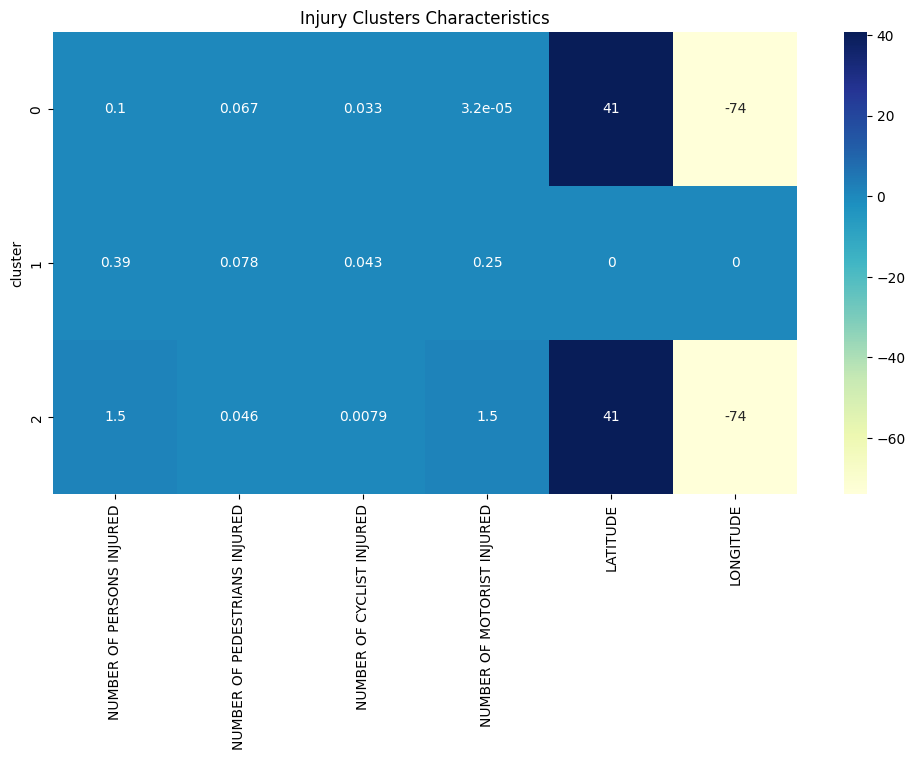

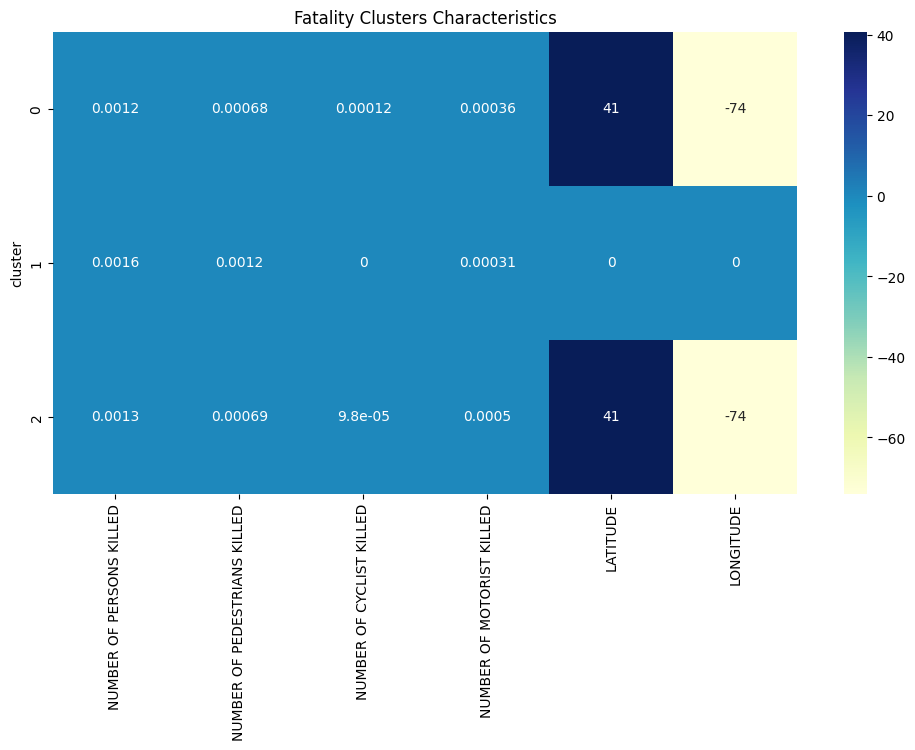

In [19]:


# Descriptive statistics for each cluster in the injuries dataset
injury_cluster_info = df_injuries.groupby('cluster').mean()
print("Cluster Information for Injuries:\n", injury_cluster_info)

# Descriptive statistics for each cluster in the fatalities dataset
fatality_cluster_info = df_fatalities.groupby('cluster').mean()
print("Cluster Information for Fatalities:\n", fatality_cluster_info)


plt.figure(figsize=(12, 6))
sns.heatmap(injury_cluster_info, annot=True, cmap="YlGnBu")
plt.title("Injury Clusters Characteristics")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(fatality_cluster_info, annot=True, cmap="YlGnBu")
plt.title("Fatality Clusters Characteristics")
plt.show()


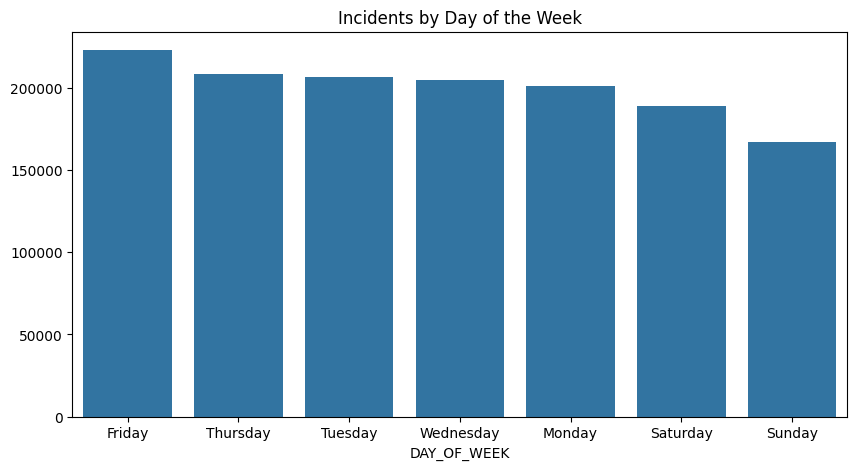

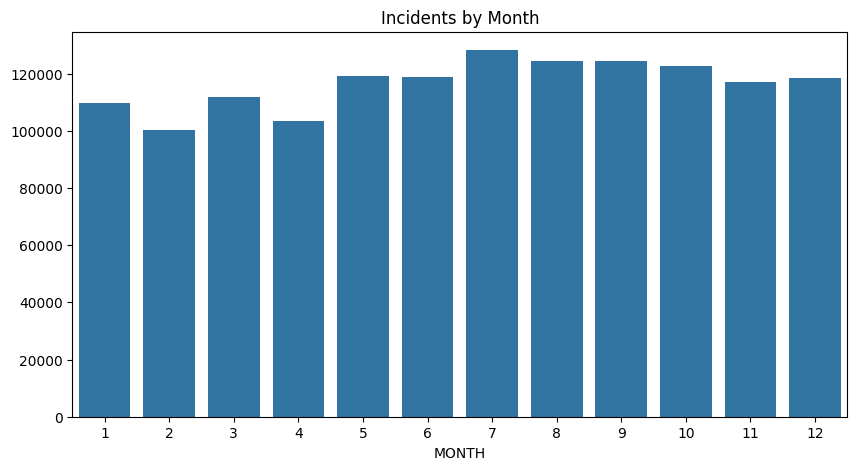

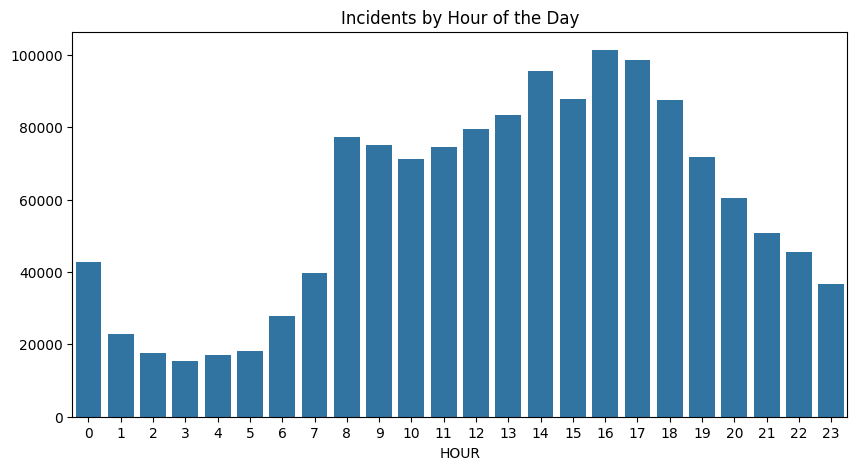

In [20]:


data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

# Extract day of the week and month from 'CRASH DATE'
data['DAY_OF_WEEK'] = data['CRASH DATE'].dt.day_name()
data['MONTH'] = data['CRASH DATE'].dt.month

# Convert 'CRASH TIME' to datetime format and extract the hour
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M')
data['HOUR'] = data['CRASH TIME'].dt.hour

# Analyze the frequency of incidents by these time units
day_of_week_counts = data['DAY_OF_WEEK'].value_counts()
month_counts = data['MONTH'].value_counts()
hour_counts = data['HOUR'].value_counts()

# Visualize these frequencies
plt.figure(figsize=(10, 5))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values)
plt.title("Incidents by Day of the Week")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title("Incidents by Month")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.title("Incidents by Hour of the Day")
plt.show()


In [21]:




# One-hot encoding for categorical variables
encoder = OneHotEncoder()
X = encoder.fit_transform(data[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 
                                'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 
                                'CONTRIBUTING FACTOR VEHICLE 5']])
y = data['NUMBER OF PERSONS KILLED']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

# Displaying the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Optional: Feature Importance Analysis
feature_importances = model.feature_importances_
feature_names = encoder.get_feature_names_out()
importance_scores = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
sorted_importance = importance_scores.sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", sorted_importance.head(10))

C:\Users\Manoj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Manoj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9987344577830847
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    279369
         1.0       0.00      0.00      0.00       340
         2.0       0.00      0.00      0.00        10
         3.0       0.00      0.00      0.00         3

    accuracy                           1.00    279722
   macro avg       0.25      0.25      0.25    279722
weighted avg       1.00      1.00      1.00    279722

Feature Importances:
                                                Feature  Importance
62                     CONTRIBUTING FACTOR VEHICLE 2_0    0.088717
53   CONTRIBUTING FACTOR VEHICLE 1_Traffic Control ...    0.083499
56          CONTRIBUTING FACTOR VEHICLE 1_Unsafe Speed    0.052802
16       CONTRIBUTING FACTOR VEHICLE 1_Drugs (illegal)    0.051904
119          CONTRIBUTING FACTOR VEHICLE 2_Unspecified    0.044190
98   CONTRIBUTING FACTOR VEHICLE 2_Passenger Distra...    0.038518
118         CONTRIBUT

C:\Users\Manoj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:





# One-hot encoding for categorical variables
encoder = OneHotEncoder()
X = encoder.fit_transform(data[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 
                                'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 
                                'CONTRIBUTING FACTOR VEHICLE 5']])
y = data['NUMBER OF PERSONS INJURED']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

# Displaying the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


feature_importances = model.feature_importances_
feature_names = encoder.get_feature_names_out()
importance_scores = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
sorted_importance = importance_scores.sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", sorted_importance.head(10))

C:\Users\Manoj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Manoj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8035907079171463
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.98      0.89    218718
         1.0       0.68      0.21      0.33     48540
         2.0       0.14      0.00      0.00      8251
         3.0       0.08      0.00      0.00      2567
         4.0       0.00      0.00      0.00       998
         5.0       0.00      0.00      0.00       368
         6.0       0.00      0.00      0.00       153
         7.0       0.00      0.00      0.00        59
         8.0       0.00      0.00      0.00        28
         9.0       0.00      0.00      0.00        10
        10.0       0.00      0.00      0.00         6
        11.0       0.00      0.00      0.00         6
        12.0       0.00      0.00      0.00         2
        13.0       0.00      0.00      0.00         4
        14.0       0.00      0.00      0.00         2
        15.0       0.00      0.00      0.00         4
        16.0       0.00     

C:\Users\Manoj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\Manoj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Manoj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Manoj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


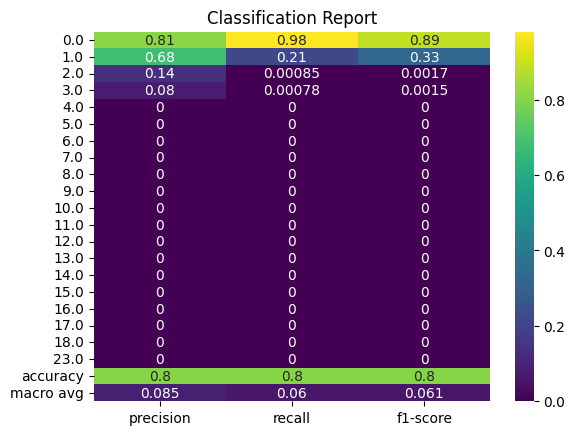

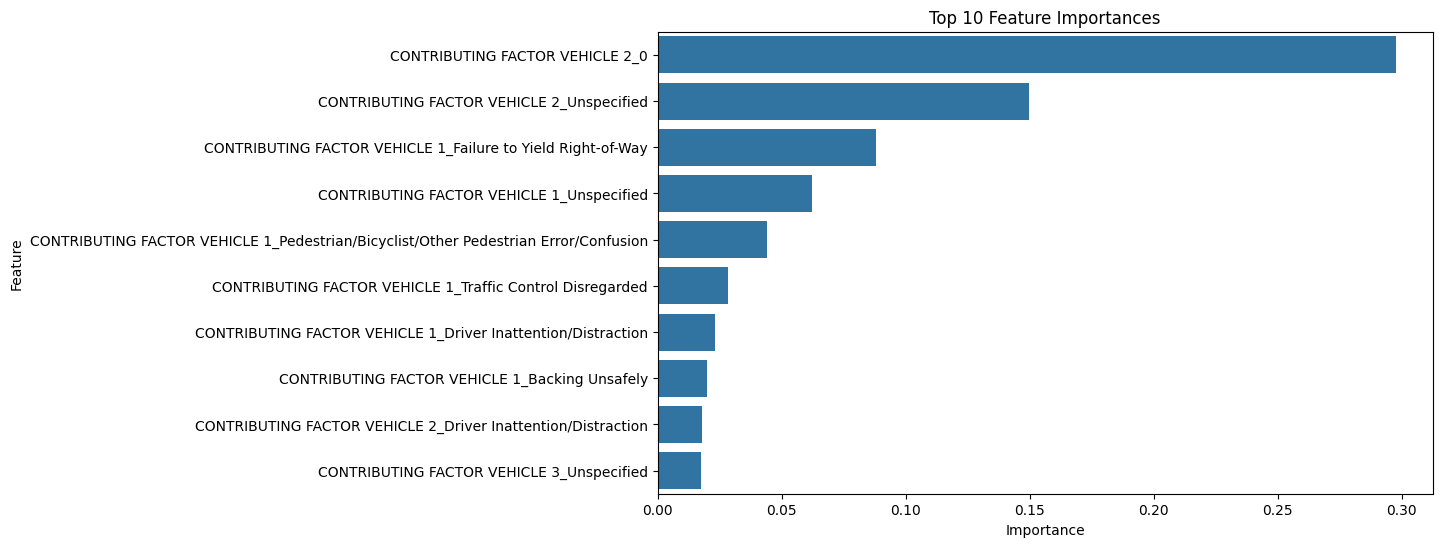

In [23]:




# 2. Classification Report Heatmap
report_dict = classification_report(y_test, predictions, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='viridis')
plt.title('Classification Report')
plt.show()

# Convert the feature importances to a DataFrame
feature_names = encoder.get_feature_names_out()
feature_importances = model.feature_importances_
importance_scores = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
sorted_importance = importance_scores.sort_values(by='Importance', ascending=False)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importances')
plt.show()
